# Importing the libraries

In [1]:
import numpy as np
import pandas as pd

import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### Set images saving path

In [2]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "ProjectImages")

# Create the directory if it does not exist
os.makedirs(IMAGES_PATH, exist_ok=True)

### Define function to save images in the specified path

In [3]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### Seed numpy for reproducible results

In [4]:
np.random.seed(42)

# Importing the dataset

In [5]:
dataset = pd.read_csv('MergeConflictsDataset.csv', sep=';')

## Inspect the dataset

In [6]:
dataset.head()

,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26973 entries, 0 to 26972
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   commit           26973 non-null  object 
 1   parent1          26973 non-null  object 
 2   parent2          26973 non-null  object 
 3   ancestor         26972 non-null  object 
 4   is pr            26973 non-null  int64  
 5   added lines      26973 non-null  int64  
 6   deleted lines    26973 non-null  int64  
 7   devs parent1     26973 non-null  int64  
 8   devs parent2     26973 non-null  int64  
 9   time             26973 non-null  int64  
 10  nr files         26973 non-null  int64  
 11  added files      26973 non-null  int64  
 12  deleted files    26973 non-null  int64  
 13  renamed files    26973 non-null  int64  
 14  copied files     26973 non-null  int64  
 15  modified files   26973 non-null  int64  
 16  nr commits1      26973 non-null  int64  
 17  nr commits2 

In [8]:
dataset.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26973.000000,2.697300e+04,2.697300e+04,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,...,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,0.777741,4.255746e+02,2.504278e+02,4.656175,1.911801,240.714159,0.752048,2.431061,1.396545,0.970229,...,4.316205,0.955437,1.338857,0.096281,1.007860,51.391280,104.662551,69.455646,68.021095,0.054425
std,0.415772,8.887706e+03,1.027916e+04,12.230444,6.534316,908.382038,10.620490,67.840678,90.614277,64.245155,...,12.924317,3.203307,4.269666,0.541916,6.033535,34.560112,89.471017,40.057823,39.385369,0.226858
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.391304,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.714286,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


Saving figure attribute_histogram_plots


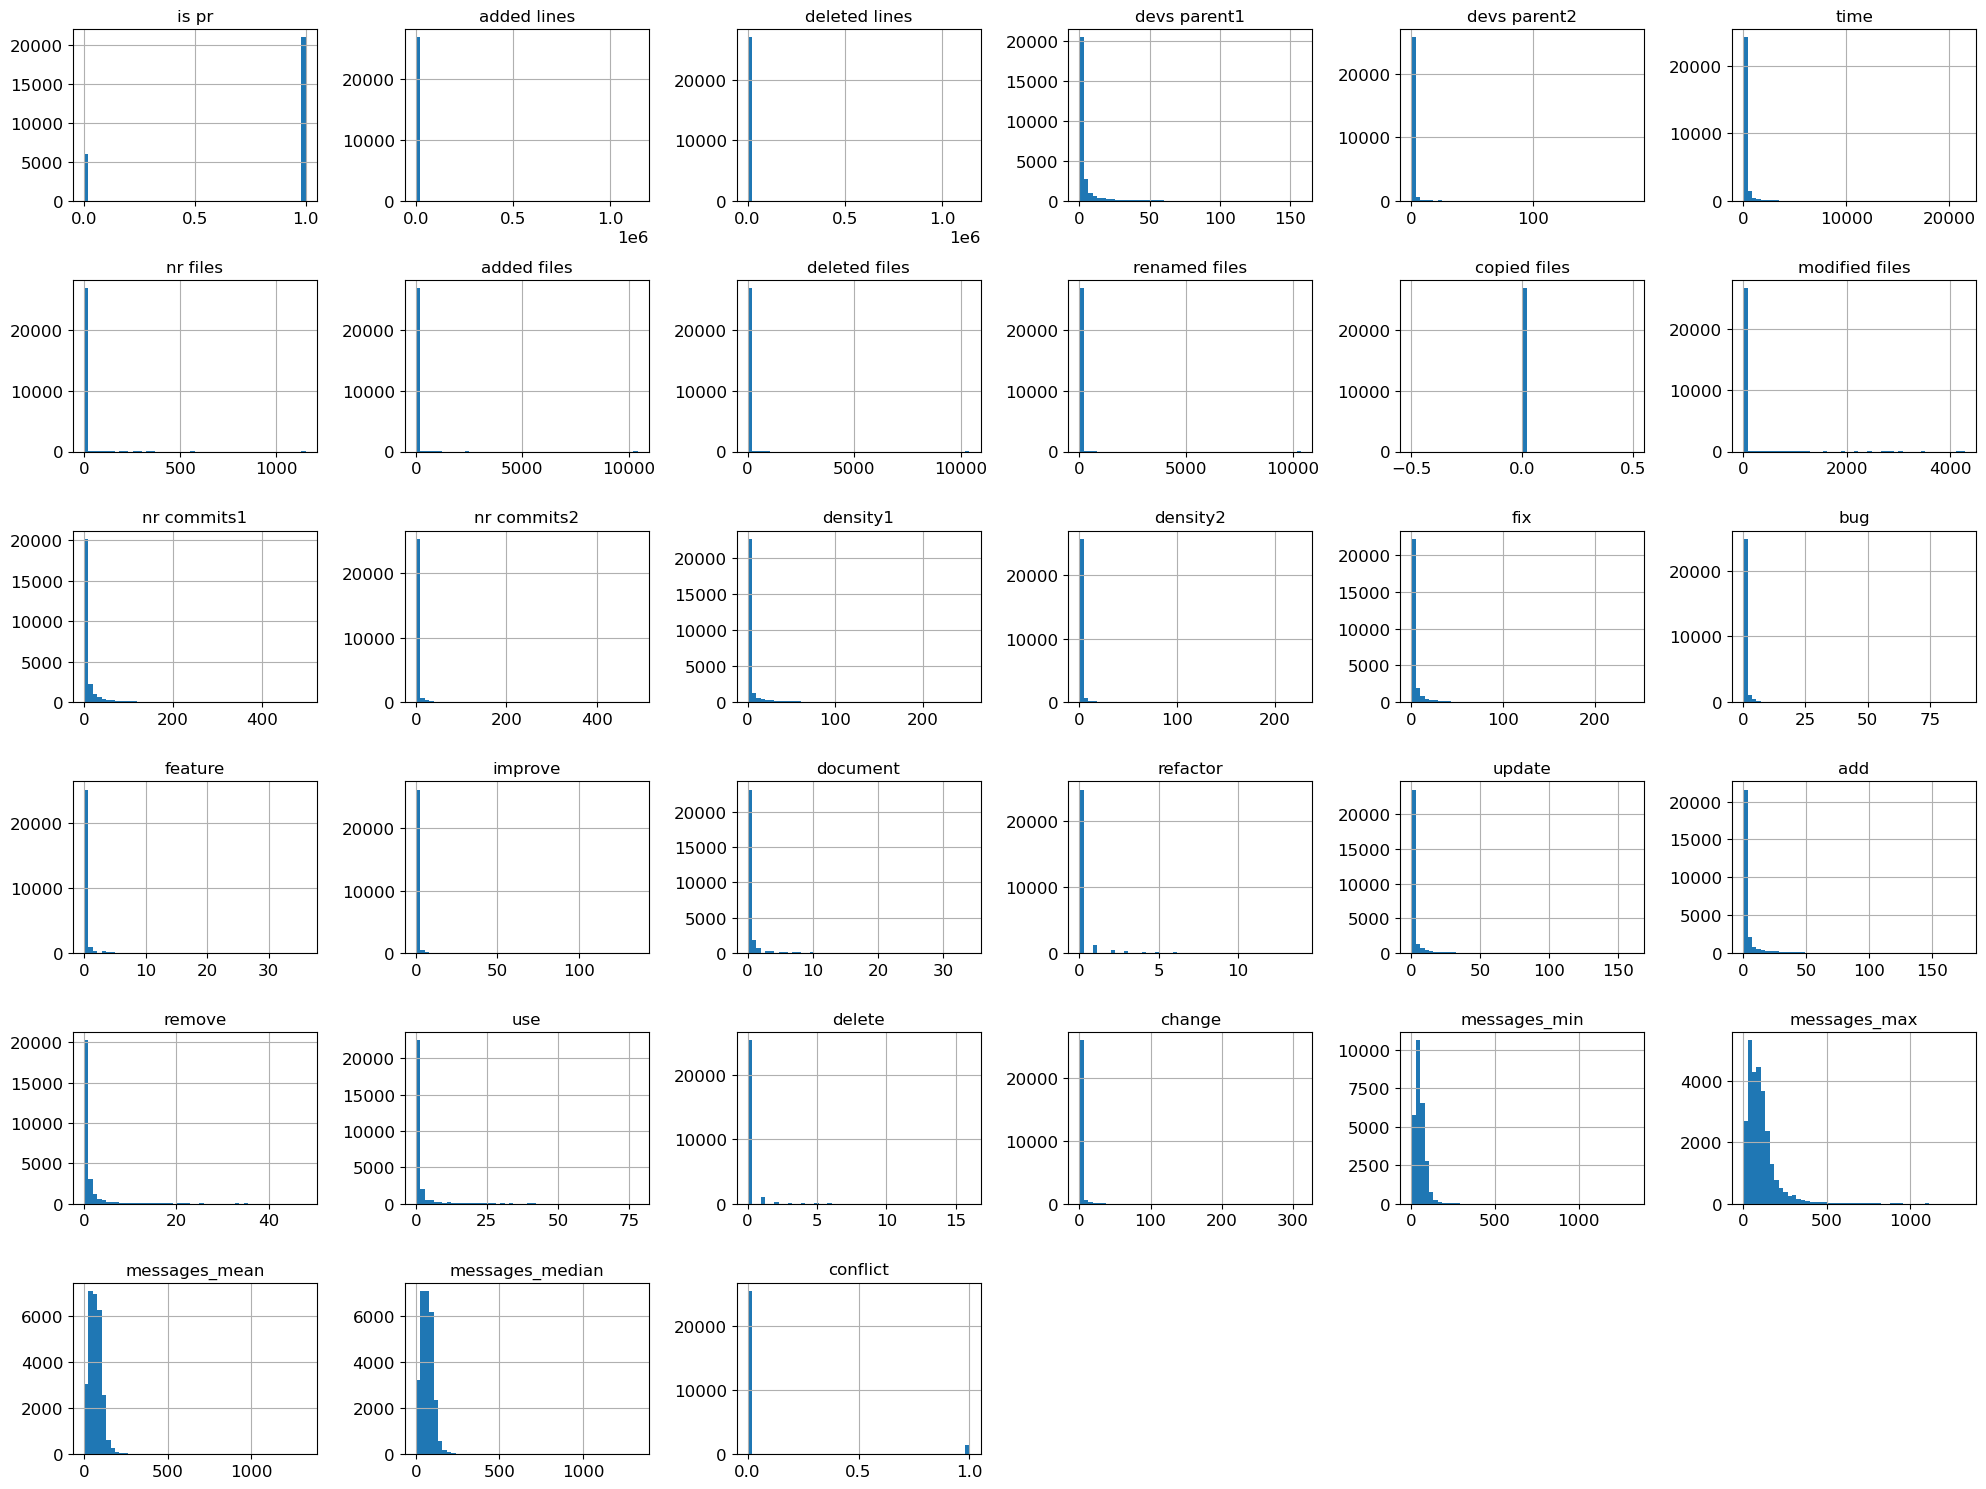

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset.hist(bins=50, figsize=(20,15))
plt.yscale('log')  # Apply logarithmic scale to y-axis for better visibility
save_fig("attribute_histogram_plots")
plt.show()

### Plot relationship between line modifications and conflicts

Saving figure total_line_modifications_conflict_relationship


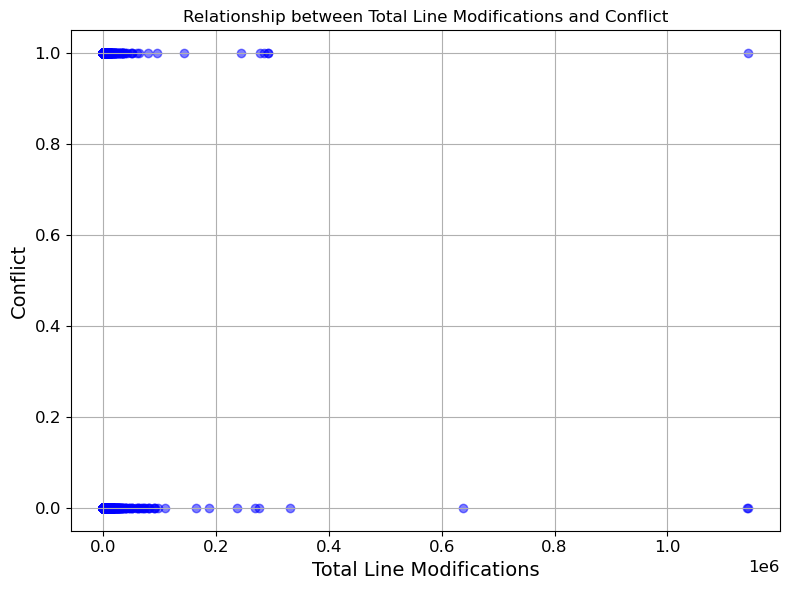

In [10]:
# Create new empty dataset
dataset_temp = pd.DataFrame()
dataset_temp["total line modifications"] = dataset["added lines"] + dataset["deleted lines"]

plt.figure(figsize=(8, 6))
plt.scatter(dataset_temp["total line modifications"], dataset["conflict"], color='blue', alpha=0.5)
plt.title('Relationship between Total Line Modifications and Conflict')
plt.xlabel('Total Line Modifications')
plt.ylabel('Conflict')
plt.grid(True)
save_fig("total_line_modifications_conflict_relationship")
plt.show()

### Plot relationship between number of developers concurrently on a branch and conflict

Saving figure concurrent_developers_conflict_relationship


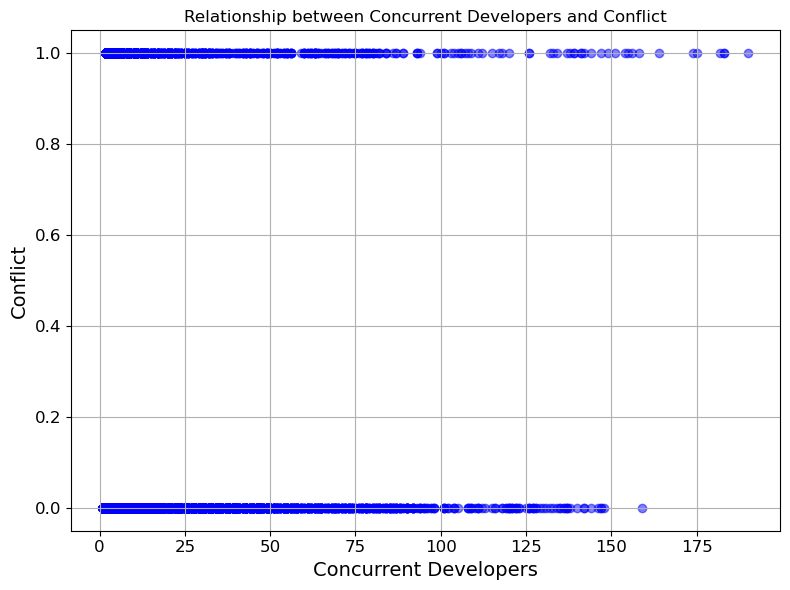

In [11]:
dataset_temp["concurrent_developers"] = dataset["devs parent1"] + dataset["devs parent2"]

plt.figure(figsize=(8, 6))
plt.scatter(dataset_temp["concurrent_developers"], dataset["conflict"], color='blue', alpha=0.5)
plt.title('Relationship between Concurrent Developers and Conflict')
plt.xlabel('Concurrent Developers')
plt.ylabel('Conflict')
plt.grid(True)
save_fig("concurrent_developers_conflict_relationship")
plt.show()

### Scatter plot for files

c:\Users\emino\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
c:\Users\emino\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
c:\Users\emino\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


Saving figure scatter_matrix_plot_files


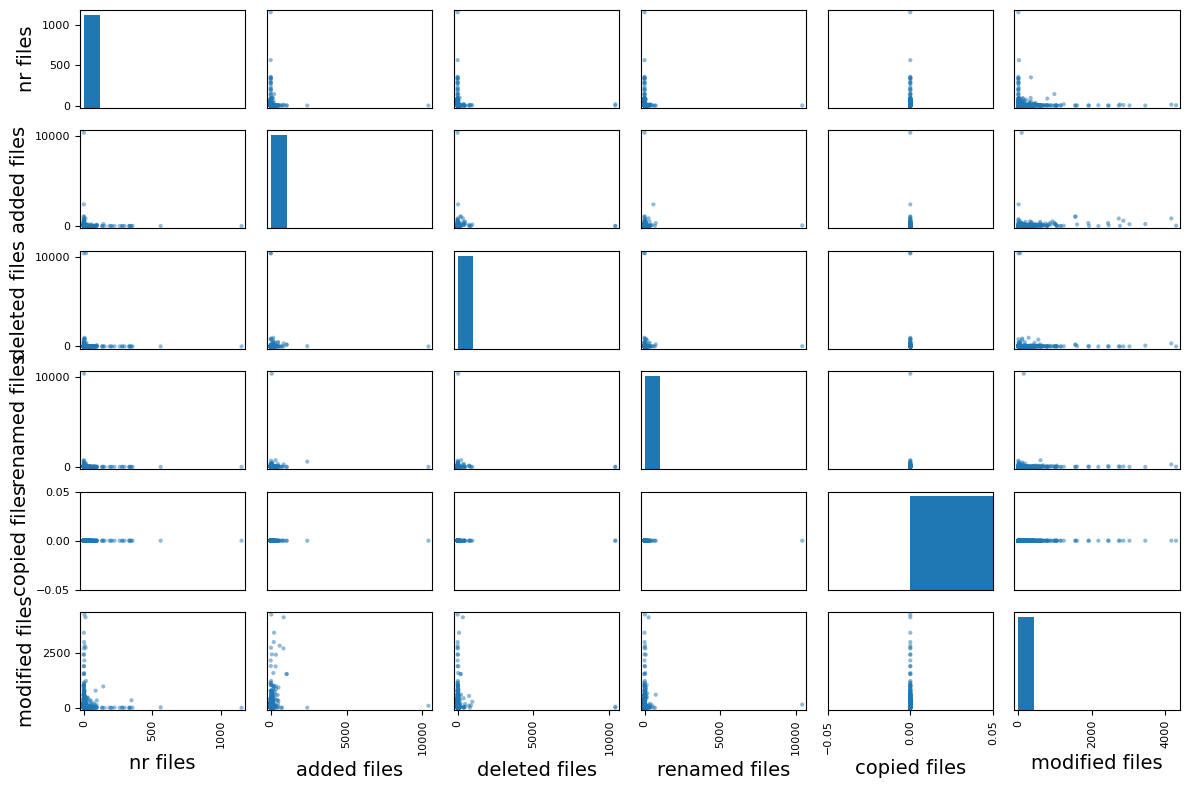

In [12]:
from pandas.plotting import scatter_matrix

attributes = ["nr files", "added files", "deleted files", "renamed files", "copied files", "modified files"]
scatter_matrix(dataset[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot_files")

## Correlation heatmap matrix

c:\Users\emino\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\emino\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
c:\Users\emino\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


Saving figure heatmap_correlation_with_conflict


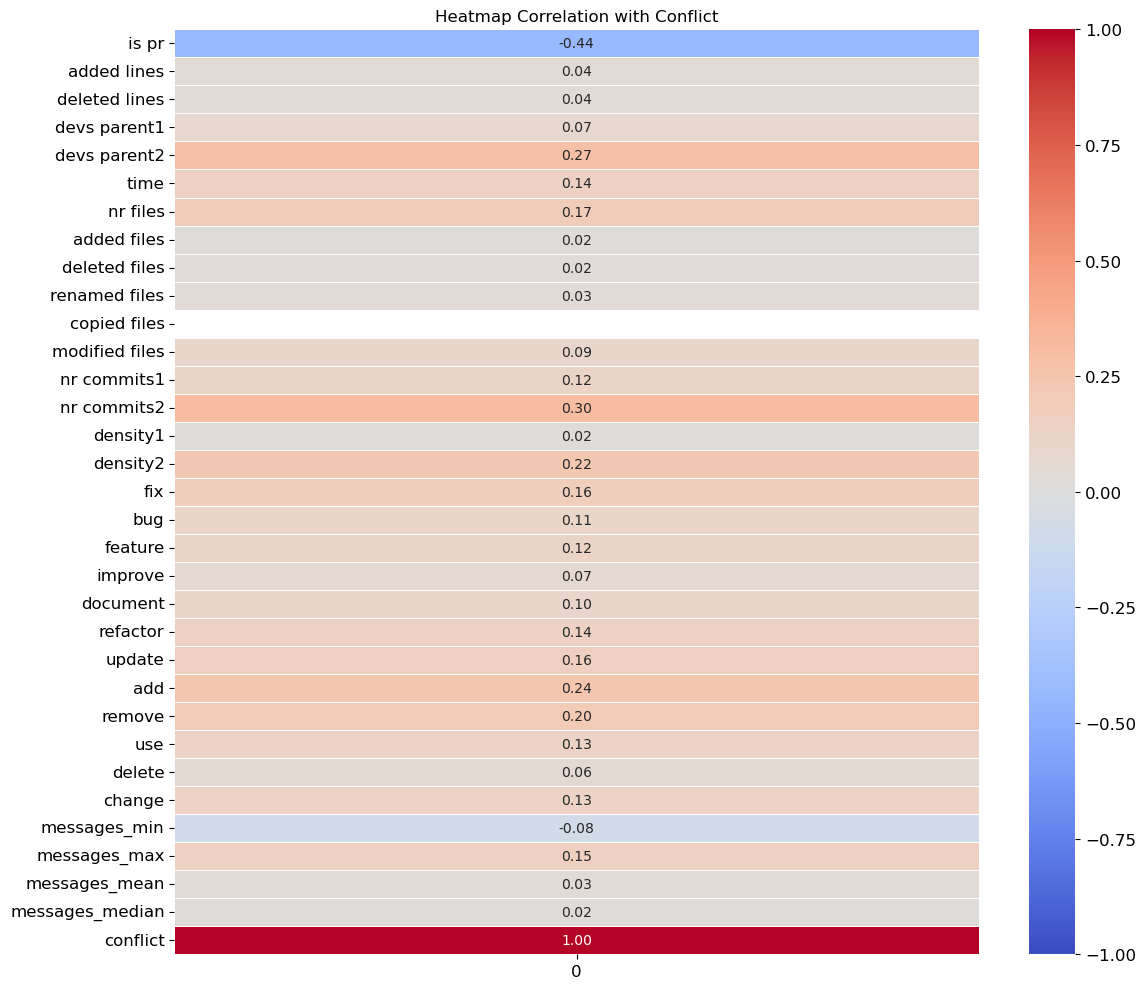

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dataset_corr = dataset.iloc[:, 4:]

# Uncomment for debugging to see which data is not numeric and could cause a conversion error down the line
# print(dataset_corr.dtypes)

# for col in dataset_corr.columns:
#     try:
#         dataset_corr[col] = pd.to_numeric(dataset_corr[col])
#     except ValueError:
#         print(f"Non-numeric data found in column: {col}")

# Compute the correlation of all other columns with 'conflict'
corr_with_conflict = dataset_corr.corrwith(dataset_corr['conflict'])

# Plot the correlation with 'conflict'
plt.figure(figsize=(12, 10))
sns.heatmap(corr_with_conflict.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Heatmap Correlation with Conflict')
save_fig("heatmap_correlation_with_conflict")
plt.show()

## Split dataset into independent and dependent variables

In [14]:
X = dataset.iloc[:, 4:-1].values
y = dataset.iloc[:, -1].values

## Inspect the dependent and independent variable(s)

In [15]:
print(X)

[[1.00000000e+00 5.00000000e+00 0.00000000e+00 ... 6.50000000e+01
  3.54000000e+01 2.00000000e+01]
 [0.00000000e+00 1.16600000e+03 1.12670000e+04 ... 1.17000000e+02
  5.85638298e+01 5.35000000e+01]
 [1.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.80000000e+01
  1.80000000e+01 1.80000000e+01]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 5.80000000e+01
  3.30000000e+01 3.30000000e+01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 8.00000000e+00
  8.00000000e+00 8.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 2.30000000e+01
  2.30000000e+01 2.30000000e+01]]


In [16]:
print(y)

[0 1 0 ... 0 0 0]


# Handle missing values

In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, :])
X[:, :] = imputer.transform(X[:, :])

# Splitting the dataset into training and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature scaling

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Selecting a kernel support vector machine model on this data with a radial basis function and balanced class weights

Class weight balancing is needed to trade off the importance of the minority class, otherwise we will have more false negatives than true negatives,
which is not desirable in this case as a team of software developers will spend much more time and delay their work due to a false negative
than a false positive which will usually waste minimal time by causing additional checks to make sure everything is good

In [20]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'rbf', random_state = 42, class_weight='balanced')

### Perform K-Fold Cross Validation with k=5 to estimate model performance on unseen data in a more generalized manner

In [21]:
from sklearn.model_selection import cross_validate

scoring = ['accuracy', 'recall', 'precision', 'f1']
scores = cross_validate(classifier, X, y, cv=5, scoring=scoring)

for metric_name, scores_array in scores.items():
    metric_mean_score = scores_array.mean()
    metric_std_score = scores_array.std()
    print(f"{metric_name}: {metric_mean_score:.2f} (+/- {metric_std_score:.2f})")

fit_time: 11.68 (+/- 0.67)
score_time: 4.19 (+/- 0.23)
test_accuracy: 0.88 (+/- 0.03)
test_recall: 0.41 (+/- 0.06)
test_precision: 0.20 (+/- 0.05)
test_f1: 0.27 (+/- 0.06)


## Fit the model on the training data

In [22]:
classifier.fit(X_train, y_train)

SVC(class_weight='balanced', random_state=42)

# Printing test set results

In [23]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [0 0]]


# Making the confusion matrix

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)
recall_score(y_test, y_pred)
precision_score(y_test, y_pred)
f1_score(y_test, y_pred)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

[[5499  901]
 [  32  312]]
Accuracy:  0.8616548042704626
Recall:  0.9069767441860465
Precision:  0.25721352019785654
F1 Score:  0.40077071290944116
